# Customer Churn Prediction - BSNL Telecom Customer Dataset (Kaggle)

# Objective


In [ ]:
Develop a predictive model to identify customers who are likely to leave a subscription-based service.

# Data Sources

In [ ]:
Data includes:

• Customer Demographics (age, gender, region, etc.)

• Transaction History (billing, payment methods, etc.)

• Usage Patterns (login frequency, duration, feature usage, etc.)

• Customer Feedback (ratings, support calls, complaints)

# Real-Life Applications of Churn Prediction

In [ ]:
1) Telecom – High competition and poor service lead to user churn.
    Examples: BSNL, Jio, Airtel

2) Streaming Services (OTT) – Content fatigue or price hikes can cause churn.
    Examples: Amazon Prime, Disney+ Hotstar

3) SaaS (Software as a Service) – Users switch to better tools or stop needing the service.
      Examples: Zoom, Google Meet, Webex, Microsoft Teams, Skype

4) Banking – Customers churn for better interest rates or digital experiences.

5) Insurance – Complex policies or poor claim service can drive churn.

6) E-commerce – Delivery issues or bad customer service may lead to churn.

7) Gyms/Fitness Centers – Lack of motivation or relocation causes drop-off.

8) Online Education Platforms – Learner disengagement or dissatisfaction increases churn.

9) Mobile Apps – Apps are deleted if not engaging or useful.

10) Energy/Utilities – Customers may switch for cheaper or green energy.

11) Hospitality (Hotels) – Loyalty programs elsewhere or poor service cause churn.

12) Airlines – Pricing, routes, or loyalty perks affect retention.

13) Food Delivery Apps – App uninstall or preference for competitors.

14) Retail Subscriptions – Users cancel when value seems low (e.g., beauty boxes).

15) Online Gaming – Users leave due to boredom or better game options.

16) Health Tech Platforms – No visible benefits may lead to churn.

17) Real Estate Platforms – Users leave post property search.

18) Ride-Hailing Services – Price and wait time influence switching.

19) Digital News/Media – Users churn due to paywalls or free alternatives.

20) Fintech Apps – Churn driven by security concerns or better experience elsewhere.

# Theory & Concept: Customer Churn


In [ ]:
What is Churn?
Churn (or customer attrition) is when a customer stops using a product or service.
This is especially critical in subscription-based businesses like telecom, OTT, or SaaS.

# Objective of Churn Prediction


In [ ]:
To identify potential churners early, allowing the business to:

• Offer discounts,

• Provide personalized support, or

• Launch retention campaigns.

# Key Concepts


In [ ]:
✅ a. Churn (Target Variable)
This is a binary classification problem:

1 (Yes) – Customer has churned

0 (No) – Customer is retained

✅ b. Features (Input Variables)
Used to predict churn:

Demographics: Age, gender, location

Transaction History: Purchase frequency, billing amount

Usage Patterns: Login frequency, session duration, feature usage

Feedback/Support Tickets: Complaints, ratings, support calls

✅ c. Target Variable
Churn Label → 0 or 1 (Retained or Churned)

# Process of Churn Prediction


In [ ]:
🛠️ Data Collection

•Gather structured customer data such as:
  • Age
  • Gender
  • Tenure
  • Usage statistics
  • Feedback or complaints
  • Billing amount, etc.

🧼 Data Preprocessing
  •Handle missing values
  •Encode categorical variables (e.g., Gender, Payment Type)
  •Normalize or scale numerical features (e.g., tenure, charges)

📊 Exploratory Data Analysis (EDA)
    •Analyze trends, patterns, and correlations:
    •Are customers with low usage more likely to churn?
    •Are complaints linked to higher churn?
    •Do certain locations or contract types influence churn?

🤖 Modeling (Predictive Techniques)
    •Use classification models like:
    •Logistic Regression
    •Decision Trees / Random Forest
    •XGBoost
    •Neural Networks

These models predict the probability of churn (output = 0 or 1).

📏 Evaluation Metrics
    •Accuracy – Overall correctness of the model
    •Precision / Recall – Focus on true positives (correct churn predictions)
    •F1 Score – Balance between precision and recall
    •AUC-ROC – Measures model’s ability to separate churned vs. retained customers

# Why Churn Prediction Matters


In [ ]:
• Cost-Efficient: Retaining a customer is 5 to 10 times cheaper than acquiring a new one.

• Proactive Strategy: Businesses can engage at-risk customers early (e.g., through offers, support, loyalty perks).

• Customer Lifetime Value (CLV): Helps maximize total revenue by increasing the customer’s time with the brand.

# Implementation of the project:



# Step 1: Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# These libraries are essential for:
# Data manipulation (pandas, numpy)
# Data visualization (matplotlib, seaborn)
# Machine learning models (sklearn)

# Step 2: Loading and Exploring the Data

In [ ]:

data = pd.read_csv("customer_churn_17May.csv") # Dataset downloaded from Kaggle
df = pd.DataFrame(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dataset Overview:

•The dataset contains:

•Churn Label: Customers who left within the last month → Churn column (Yes/No)

•Services Subscribed:

    •PhoneService, MultipleLines
    •InternetService, OnlineSecurity, OnlineBackup
    •DeviceProtection, TechSupport, StreamingTV, StreamingMovies

•Customer Account Info:
    •tenure, Contract, PaymentMethod
    •PaperlessBilling, MonthlyCharges, TotalCharges

•Demographics:
•gender, SeniorCitizen, Partner, Dependents


In [ ]:
df.columns # checking the columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Columns description:

1) customerID	- Categorical (ID) - Unique identifier for each customer. Not useful for analysis itself but helps track records.
2) gender	Categorical	Male or Female. We can check if gender affects churn.
3) SeniorCitizen -	Integer (0 or 1) -	Whether the customer is a senior (1 = Yes, 0 = No).
4) Partner -	Categorical	- Whether the customer has a partner (Yes/No). Might affect loyalty.
5) Dependents	Categorical	Whether the customer has children or other dependents.
6) tenure	- Numerical (Integer) -	Number of months the customer has stayed. Low tenure may link to higher churn.
7) PhoneService -	Categorical -	Whether the customer has a phone service.
8) MultipleLines -	Categorical	- Whether the customer has multiple phone lines.
9) InternetService - Categorical -	Type of internet (DSL, Fiber optic, or No service). Key for digital service usage.
10)OnlineSecurity- Categorical	Whether the customer has online security add-on.
11)OnlineBackup	-Categorical	Whether the customer has online backup service.
12)DeviceProtection	-Categorical	Device protection service included or not.
13)TechSupport	-Categorical	Technical support availability (Yes/No/No internet service).
14)StreamingTV	-Categorical	Access to TV streaming through provider.
15)StreamingMovies-	Categorical	Access to movie streaming through provider.
16)Contract	-Categorical	Type of contract (Month-to-month, One year, Two year). Month-to-month often has higher churn.
17)PaperlessBilling	-Categorical	If the customer receives paperless bills (Yes/No).
18)PaymentMethod	-Categorical	How customer pays: Electronic check, Mailed check, Credit card, etc.
19)MonthlyCharges	-Numerical (Float)	What they pay per month. High charges may link to churn.
20)TotalCharges	-Numerical (Float)	Total money paid till now. Low total with high churn may show early exits.
21)Churn	-Categorical (Target)	Final label — whether the customer left (Yes) or stayed (No). This is what we’re predicting.

In [ ]:
# checking the basic info of the dataset
df.info # Data types & non-null values

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [ ]:
df.describe() #descriptive statistics

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Step 3 - Data Cleaning



# 1: Back Up the Raw Data

In [ ]:
#Always keep a copy of the original dataset.

df_raw = df.copy()

# 2: Check for Duplicate Rows

In [ ]:
# Remove exact duplicate records.

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# 3: Strip Whitespace (Column Names & String Values)

In [ ]:
# Fix hidden errors caused by extra spaces.

# Step 1: Strip whitespace from column names
df.columns = df.columns.str.strip()

# Step 2: Strip whitespace from each string column in the dataframe
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Stripping whitespace helps prevent subtle bugs when comparing strings (like ' Yes' vs 'Yes').
# It cleans the data and makes the dataset consistent.
# This is a mandatory step in data cleaning.

# 4: Fix Inconsistent Data Types

In [ ]:
# Convert columns like TotalCharges to numeric.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# what coerce does - Convert invalid entries (e.g., empty strings or spaces) to NaN (missing values)

df['TotalCharges'].isnull().sum() # So we have got 11 missing values in Totalcharges column

#When we are cleaning data, and a numeric column like TotalCharges has missing values (NaN),
#we often want to fill (or "impute") them with a value that doesn’t distort the overall dataset.

# Here we fill with median, as Data may have outliers or is skewed (which is common in real-world)

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)
df['TotalCharges'].head(30)


0       29.85
1     1889.50
2      108.15
3     1840.75
4      151.65
5      820.50
6     1949.40
7      301.90
8     3046.05
9     3487.95
10     587.45
11     326.80
12    5681.10
13    5036.30
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19    1862.90
20      39.65
21     202.25
22      20.15
23    3505.10
24    2970.30
25    1530.60
26    4749.15
27      30.20
28    6369.45
29    1093.10
Name: TotalCharges, dtype: float64

# 5: Handle Missing Values

In [ ]:
#Identify and fill/drop NaN values.

df.isnull().sum()

#This means there are no missing values left in any column.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 6: Correct Typos in Categorical Data

In [ ]:
# First we Check unique values for each categorical column to find any spelling mistakes or inconsistencies

for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("------")

#Based on your output, there are no major typos — the categories are consistent and clean

Unique values in customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
------
Unique values in gender:
['Female' 'Male']
------
Unique values in Partner:
['Yes' 'No']
------
Unique values in Dependents:
['No' 'Yes']
------
Unique values in PhoneService:
['No' 'Yes']
------
Unique values in MultipleLines:
['No phone service' 'No' 'Yes']
------
Unique values in InternetService:
['DSL' 'Fiber optic' 'No']
------
Unique values in OnlineSecurity:
['No' 'Yes' 'No internet service']
------
Unique values in OnlineBackup:
['Yes' 'No' 'No internet service']
------
Unique values in DeviceProtection:
['No' 'Yes' 'No internet service']
------
Unique values in TechSupport:
['No' 'Yes' 'No internet service']
------
Unique values in StreamingTV:
['No' 'Yes' 'No internet service']
------
Unique values in StreamingMovies:
['No' 'Yes' 'No internet service']
------
Unique values in Contract:
['Month-to-month' 'One year' 'Two year']
------
Unique values in Paperle

# 7. Cleaning and standardizing all service-related categorical columns

In [ ]:
# 1. Clean and standardize strings (lowercase + strip)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [ ]:
#2. Fix special values in service-related columns
# For these columns:
# ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace 'no internet service' and 'no phone service' with 'no' to simplify categories:

cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols:
    df[col] = df[col].replace({'no internet service': 'no', 'no phone service': 'no'})

df['MultipleLines'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# Drop customerID column (not needed for analysis)
df.drop('customerID', axis=1, inplace=True)

In [ ]:
# 1. Clean and encode the gender column

# Remove spaces and lowercase
df['gender'] = df['gender'].str.strip().str.lower()

# Convert to binary: female = 1, male = 0
df['gender'] = df['gender'].map({'female': 1, 'male': 0})

df['gender'].value_counts(dropna=False)

gender
0    3555
1    3488
Name: count, dtype: int64

In [ ]:
# 2: Clean service-related categorical columns

# Now, we’ll standardize text data in all string (object) columns:
# Remove leading/trailing spaces
# Convert to lowercase

# Standardize all string columns: strip + lowercase
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

df['MultipleLines'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# 3: Replace "no internet service" / "no phone service" with just "no"

columns_to_clean = ['MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

for col in columns_to_clean:
    df[col] = df[col].replace({'no internet service': 'no', 'no phone service': 'no'})
df[columns_to_clean].head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,no,dsl,no,yes,no,no,no,no
1,no,dsl,yes,no,yes,no,no,no
2,no,dsl,yes,yes,no,no,no,no
3,no,dsl,yes,no,yes,yes,no,no
4,no,fiber optic,no,no,no,no,no,no


# 8. Encoding

In [ ]:
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in service_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df[service_cols].head()

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0
2,0,1,1,0,0,0,0
3,0,1,0,1,1,0,0
4,0,0,0,0,0,0,0


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,yes,no,1,no,0,dsl,0,1,0,0,0,0,month-to-month,yes,electronic check,29.85,29.85,no
1,0,0,no,no,34,yes,0,dsl,1,0,1,0,0,0,one year,no,mailed check,56.95,1889.50,no
2,0,0,no,no,2,yes,0,dsl,1,1,0,0,0,0,month-to-month,yes,mailed check,53.85,108.15,yes
3,0,0,no,no,45,no,0,dsl,1,0,1,1,0,0,one year,no,bank transfer (automatic),42.30,1840.75,no
4,1,0,no,no,2,yes,0,fiber optic,0,0,0,0,0,0,month-to-month,yes,electronic check,70.70,151.65,yes


In [ ]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df[binary_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,dsl,0,1,0,0,0,0,month-to-month,1,electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,dsl,1,0,1,0,0,0,one year,0,mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,dsl,1,1,0,0,0,0,month-to-month,1,mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,dsl,1,0,1,1,0,0,one year,0,bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,fiber optic,0,0,0,0,0,0,month-to-month,1,electronic check,70.70,151.65,1


In [ ]:
# for the InternetService column:

# using one hot encoding

df = pd.get_dummies(df, columns=['InternetService'], drop_first=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_fiber optic,InternetService_no
0,1,0,1,0,1,0,0,0,1,0,...,0,0,month-to-month,1,electronic check,29.85,29.85,0,False,False
1,0,0,0,0,34,1,0,1,0,1,...,0,0,one year,0,mailed check,56.95,1889.50,0,False,False
2,0,0,0,0,2,1,0,1,1,0,...,0,0,month-to-month,1,mailed check,53.85,108.15,1,False,False
3,0,0,0,0,45,0,0,1,0,1,...,0,0,one year,0,bank transfer (automatic),42.30,1840.75,0,False,False
4,1,0,0,0,2,1,0,0,0,0,...,0,0,month-to-month,1,electronic check,70.70,151.65,1,True,False


In [ ]:
#The InternetService_fiber optic and InternetService_no columns are boolean (True/False) right now, but for machine learning or analysis, you usually want them as 0/1 numeric values.

#Step: Convert those two columns from True/False to 0/1.

df['InternetService_fiber optic'] = df['InternetService_fiber optic'].astype(int)
df['InternetService_no'] = df['InternetService_no'].astype(int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_fiber optic,InternetService_no
0,1,0,1,0,1,0,0,0,1,0,...,0,0,month-to-month,1,electronic check,29.85,29.85,0,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,0,one year,0,mailed check,56.95,1889.50,0,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,0,month-to-month,1,mailed check,53.85,108.15,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,0,one year,0,bank transfer (automatic),42.30,1840.75,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,month-to-month,1,electronic check,70.70,151.65,1,1,0


In [ ]:
# Clean & encode Contract column
# Contract has values like 'month-to-month', 'one year', 'two year'.

# Use pd.get_dummies again for Contract.

# Drop one dummy column to avoid multicollinearity (drop_first=True).

df = pd.get_dummies(df, columns=['Contract'], drop_first=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_fiber optic,InternetService_no,Contract_one year,Contract_two year
0,1,0,1,0,1,0,0,0,1,0,...,0,1,electronic check,29.85,29.85,0,0,0,False,False
1,0,0,0,0,34,1,0,1,0,1,...,0,0,mailed check,56.95,1889.50,0,0,0,True,False
2,0,0,0,0,2,1,0,1,1,0,...,0,1,mailed check,53.85,108.15,1,0,0,False,False
3,0,0,0,0,45,0,0,1,0,1,...,0,0,bank transfer (automatic),42.30,1840.75,0,0,0,True,False
4,1,0,0,0,2,1,0,0,0,0,...,0,1,electronic check,70.70,151.65,1,1,0,False,False


In [ ]:
df['Contract_one year'] = df['Contract_one year'].astype(int)
df['Contract_two year'] = df['Contract_two year'].astype(int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,PaymentMethod,Monthly_Charges,Total_Charges,Churn,InternetService_fiber optic,InternetService_no,Contract_one year,Contract_two year
0,1,0,1,0,1,0,0,0,1,0,...,0,1,electronic check,29.85,29.85,0,0,0,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,0,mailed check,56.95,1889.5,0,0,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,0,1,mailed check,53.85,108.15,1,0,0,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,0,bank transfer (automatic),42.30,1840.75,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,electronic check,70.70,151.65,1,1,0,0,0


In [ ]:
#Convert the PaymentMethod column into dummy variables because it has multiple categories useing one hot encoding

df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_fiber optic,InternetService_no,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,False,False,False,True,False


In [ ]:
#Converting bool values of Payment method to 0 and 1

df['PaymentMethod_credit card (automatic)'] = df['PaymentMethod_credit card (automatic)'].astype(int)
df['PaymentMethod_electronic check'] = df['PaymentMethod_electronic check'].astype(int)
df['PaymentMethod_mailed check'] = df['PaymentMethod_mailed check'].astype(int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_fiber optic,InternetService_no,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,1,0,1,0,1,0,NaN,NaN,NaN,NaN,...,29.85,29.85,0,0,0,False,False,0,1,0
1,0,0,0,0,34,1,NaN,NaN,NaN,NaN,...,56.95,1889.50,0,0,0,True,False,0,0,1
2,0,0,0,0,2,1,NaN,NaN,NaN,NaN,...,53.85,108.15,1,0,0,False,False,0,0,1
3,0,0,0,0,45,0,NaN,NaN,NaN,NaN,...,42.30,1840.75,0,0,0,True,False,0,0,0
4,1,0,0,0,2,1,NaN,NaN,NaN,NaN,...,70.70,151.65,1,1,0,False,False,0,1,0


# 9. Finding and Removing Outliers

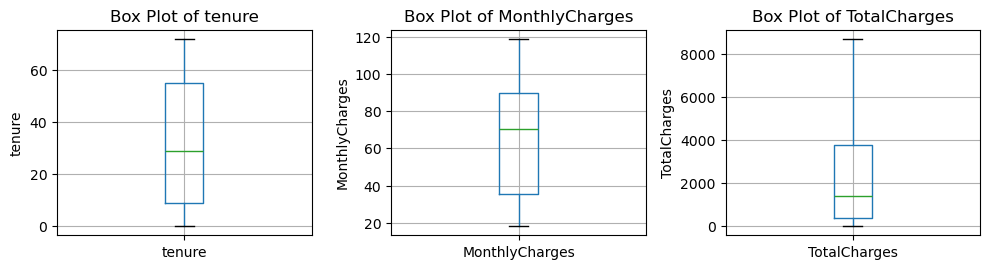

In [ ]:
#Removing outliers — especially useful before modeling or visualizing customer behavior.

# First I will check are there any outliers in my numeric columns[tenure,Monthlycharges, Totalcharges] for this purpose I will use box-plot

# List of numeric columns to check
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set plot size
plt.figure(figsize=(10, 5)) #10 width and 5 height

# Create subplots for each numeric column
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)  # 1 row, 3 columns, position i+1
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Explanation

#for i, col in enumerate(num_cols):
# we are looping over our list of numeric column names (example: ['tenure', 'MonthlyCharges', 'TotalCharges']).
# enumerate() gives both:
# i → the index (0, 1, 2)
# col → the actual column name

# plt.subplot(2, 3, i + 1)
# This sets up where to place each plot.
# 2, 3 means:
# 2 row
# 3 columns
# i+1 picks the position:
# First loop → subplot(2, 3, 1)
# Second loop → subplot(2, 3, 2)
# Third loop → subplot(2, 3, 3)

In [ ]:
# Interpretation of the above box plot:

As we can see there are no datapoints outside the box, so there are no outliers

# 10. Normalize or Scale Numeric Values

In [ ]:
In my customer churn classification project, I’m using models like Logistic Regression, Decision Tree, and Random Forest.
To prepare the data for these models, I chose to apply normalization using MinMaxScaler for the following reasons:

Why MinMaxScaler?

MinMaxScaler transforms features to a 0 to 1 range.
This helps Logistic Regression, which is sensitive to feature scale, perform better.
It ensures all numeric features contribute proportionately, especially if one feature has a much higher range (like TotalCharges)
than another (like tenure).

Why not Standardization (StandardScaler)?

Standardization transforms data to have a mean of 0 and standard deviation of 1.
It's good if the data is normally distributed (bell-shaped curve).
But in our data, features like TotalCharges and tenure are not normally distributed.
Also, StandardScaler can give negative values, which might be harder to interpret in this business case
(like negative charges or tenure doesn’t make sense).

In [ ]:
# Applying normalization

from sklearn.preprocessing import MinMaxScaler

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

#Now our numerical columns are in range(0,1)

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Monthly_Charges,Total_Charges,Churn,InternetService_fiber optic,InternetService_no,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


# 11. Reorder Columns

In [ ]:
# For better readability and analysis, I moved the Churn column (my target variable) to the first position.
# In classification projects, it's helpful to bring the target column (Churn) to the front of the dataset
# so it’s easier to see, analyze, and refer to during modeling or reporting.

churn = df.pop("Churn") # This line removes the churn column from dataframe and stores it in a variable churn
df.insert(0, "Churn", churn) # this line inserts the churn column back in dataframe at the index 0 means in the first

#This helps keep the dataset organized when working on modeling and EDA.

# 12. Rename Columns

In [ ]:
# I renamed several columns to make them more readable and consistent.
# For example:
# MonthlyCharges to Monthly_Charges
# InternetService_fiber optic to Fiber_Internet
# PaymentMethod_credit card (automatic) to Payment_CreditCard
# I used df.rename() with inplace=True to apply changes.

df.rename(columns = {
    'MonthlyCharges': 'Monthly_Charges',
    'TotalCharges': 'Total_Charges',
    'InternetService_fiber optic': 'Fiber_Internet',
    'PaymentMethod_credit card (automatic)': 'Payment_CreditCard',
    'PaymentMethod_electronic check': 'Payment_Electronic',
    'PaymentMethod_mailed check': 'Payment_MailedCheck'
}, inplace=True)

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaperlessBilling,Monthly_Charges,Total_Charges,Fiber_Internet,InternetService_no,Contract_one year,Contract_two year,Payment_CreditCard,Payment_Electronic,Payment_MailedCheck
0,0,1,0,1,0,0.013889,0,0,0,1,...,1,0.115423,0.001275,0,0,False,False,False,True,False
1,0,0,0,0,0,0.472222,1,0,1,0,...,0,0.385075,0.215867,0,0,True,False,False,False,True
2,1,0,0,0,0,0.027778,1,0,1,1,...,1,0.354229,0.010310,0,0,False,False,False,False,True
3,0,0,0,0,0,0.625000,0,0,1,0,...,0,0.239303,0.210241,0,0,True,False,False,False,False
4,1,1,0,0,0,0.027778,1,0,0,0,...,1,0.521891,0.015330,1,0,False,False,False,True,False


# 13. Feature Extraction

In [ ]:
Feature extraction means:

Creating new useful columns (features) from existing data to help our model learn better.

Because raw data isn’t always in the best format for learning.

We extract or engineer better features so models can:
Understand trends
Separate different types of customers
Improve accuracy.

In my current dataset:

There is no datetime column (such as SignUpDate, LastLogin, etc.) for extracting features like Month, Year, or DaysSinceJoin.

I have already normalized the tenure column, so deriving TenureGroup now using pd.cut() would not be meaningful.

I decided to skip this step for now, to ensure accuracy and avoid introducing incorrect logic.

# 14. Detect Data Imbalance

In [ ]:
To check if the Churn target column is imbalanced, I counted the number of 0s (non-churned) and 1s (churned) using .value_counts()
and visualized it using sns.countplot().

The result shows the proportion of churn vs non-churn customers.
If the difference between the two classes is very high, it means data is imbalanced.
This step is important to decide whether to apply techniques like SMOTE, undersampling, or class weight adjustments later during modeling.

In [ ]:
print(df['Churn'].value_counts())
print("\nChurn Class % Distribution:")
print(round(df['Churn'].value_counts(normalize=True) * 100, 2))

Churn
0    5174
1    1869
Name: count, dtype: int64

Churn Class % Distribution:
Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


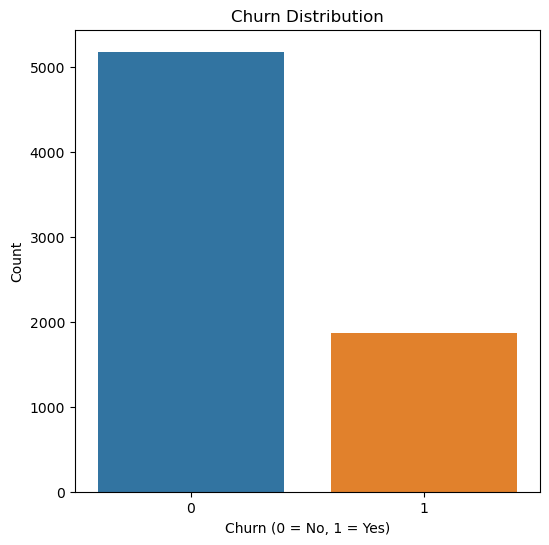

In [ ]:
# Visualize class imbalance

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.countplot(x='Churn', data = df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
I examined the distribution of the Churn column using .value_counts() and found:

•Churn = 0 (No): 5,174 records (73.5%)
•Churn = 1 (Yes): 1,869 records (26.5%)

This shows that the data is moderately imbalanced.
The imbalance could bias the model to predict "No Churn" more often.
This will be addressed during the modeling phase using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or
by using class weights in classifiers like logistic regression or decision trees.
Resampling
Class weight adjustment in models

# 15. Backup final cleaned dataset


In [ ]:
df.to_csv('cleaned_churn_data.csv', index=False)

# Exploratory Data Analysis

In [ ]:
# 1. Correlation Matrix and Heatmap - To visualize relationships between numerical columns,
especially how strongly they correlate with Churn (our target).

Why Do This?

*Helps detect multicollinearity (features highly correlated with each other)
*Identify features that are strongly correlated with target (Churn)
*Useful before feature selection or modeling

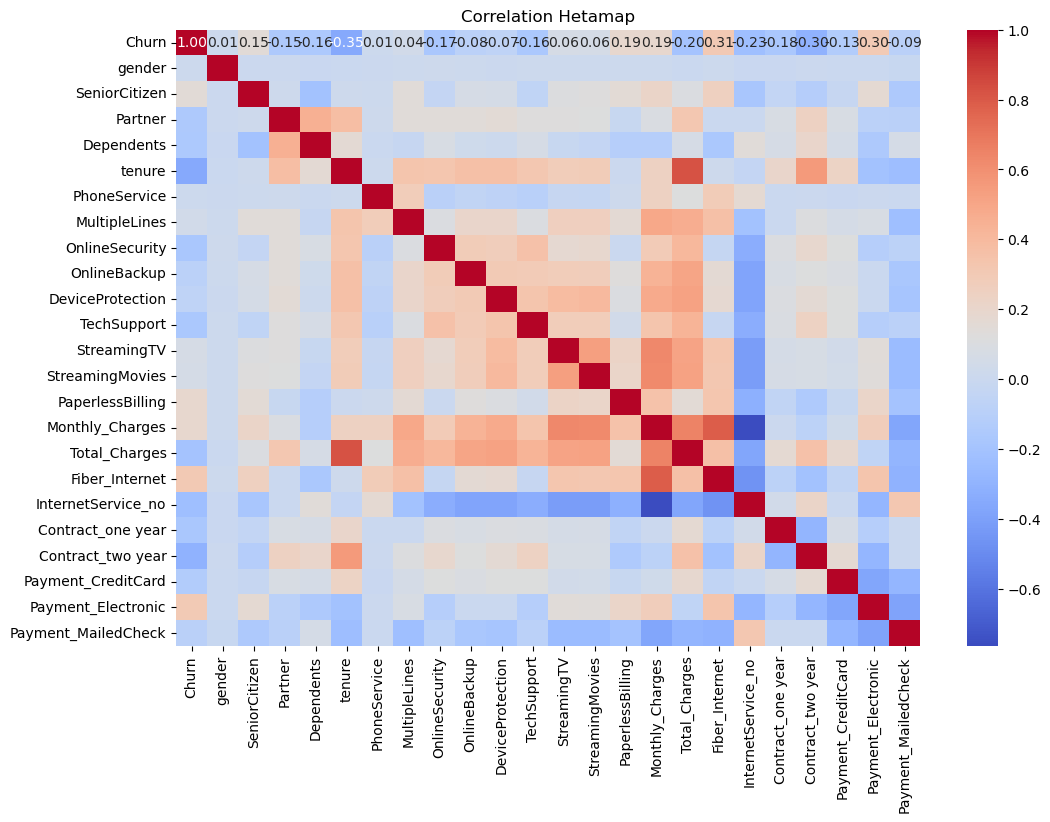

In [ ]:
# plotting heatmap

#Calculate correlation matrix
corr_matrix = df.corr()

#Set plot size
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix,
            annot = True, # shows correlation values
            fmt = '.2f', # consider only upto 2 decimal places
            cmap = 'coolwarm') # color scheme
plt.title("Correlation Hetamap")
plt.show()


In [ ]:
# Interpretation of the above heatmap:
# Features with Stronger Correlation (with Churn)
1) Contract_two year	−0.30	Customers with 2-year contracts are less likely to churn. Makes sense—long-term users are more committed.

2) Contract_one year	−0.20	Same idea—1-year contracts also reduce churn, but not as strongly as 2-year ones.

3) PaperlessBilling	    +0.19	Customers using paperless billing are slightly more likely to churn. Could be due to digital-only engagement.

4) InternetService_Fiber_Internet	+0.30	Fiber internet users tend to churn more—maybe due to dissatisfaction with pricing or service.

5) TechSupport	  −0.17	Customers with tech support churn less — support might help retention.

6) OnlineSecurity	−0.17	Security services reduce churn slightly—possibly indicating higher satisfaction.

7) tenure	−0.35	One of the strongest negative correlations. Newer customers are more likely to churn.

8) MonthlyCharges	+0.19	Higher monthly bills are slightly associated with churn. Pricing could be a factor.

The heatmap helped identify the most influential factors affecting churn.
Features like contract type, tenure, and technical services showed a strong correlation with churn behavior.
These insights will guide feature selection and model building.

# Splitting the data

In [ ]:
# Splitting the data befor modelling and applying SMOTE as my target data is imbalanced.

# We'll use train_test_split from sklearn to divide our cleaned dataset into:

# Training set – for training the model
# Testing set – for evaluating model performance
# (We typically use 80% for training and 20 for testing)

from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis = 1)
y = df['Churn']

# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42)

# random_state =42 - Ensures reproducability,
# stratify = y, Because our data is imbalanced, this ensures both classes (0 and 1) are proportionally represented in both train and test sets.

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (5634, 23)
X_test: (1409, 23)
y_train: (5634,)
y_test: (1409,)


# Applying SMOTE Technique

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 4139, 1: 1495})
After SMOTE: Counter({0: 4139, 1: 4139})


In [ ]:
Original Data: Total = 7043

Churn = 0 (No) → 5174
Churn = 1 (Yes) → 1869

Train/Test Split (80/20)
→ Train Data (5634 samples):

Churn = 0: 4139
Churn = 1: 1495

After SMOTE:
0: 4139 (original)
1: 4139 (original + synthetic)

# Model Building - LogisticRegression

In [ ]:
# The goal is to predict whether a customer will churn or not.

from sklearn.linear_model import LogisticRegression

#Train your model
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:\n", classification_report(y_test, y_pred), "\n")
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
  [[772 263]
 [100 274]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.74      0.75      1409
 

Accuracy: 0.7423704755145494


In [ ]:
                      Predicted Not Churn (0)	            Predicted Churn (1)
Actual Not Churn (0)	      779	                        256
Actual Churn (1)	          96	                        278

Sum = 779 + 256 + 96 + 278 = 1409 - Which matches the number of test samples in our report

What it means:
True Negatives (TN) = 779 (correctly predicted non-churners)
False Positives (FP) = 256 (predicted churn, but they didn’t churn)
False Negatives (FN) = 96 (missed churners)
True Positives (TP) = 278 (correctly predicted churners)


Metric
Accuracy	Overall correct predictions	75%	Good, but not enough in churn-sensitive cases
Precision (1)	Out of predicted churn, how many were correct	52%	Needs improvement
Recall (1)	Out of actual churners, how many did we catch	74%	This is decent!
F1-Score (1)	Balance of precision & recall	0.61	Medium – can improve


Interpretation
The model catches most churners (recall = 74%), but it also wrongly flags many non-churners as churn (FP = 256) — which brings precision down.

In churn problems, recall is often more important (catching most churners is key), but we don’t want too many false alarms either.

The Logistic Regression model trained on SMOTE-balanced data achieved good recall for the churn class (74%),
but the precision was low (52%), indicating a high number of false positives.

Next step – Adding class weights:
To address the class imbalance in the test set and improve precision, I am re-training the Logistic Regression model using:
LogisticRegression(class_weight='balanced')

# Class-weighted Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression with class weights
model = LogisticRegression(class_weight = 'balanced', random_state =42)
model.fit(X_train,y_train) # Use original X_train without SMOTE

# Predict and evaluate
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[749 286]
 [ 81 293]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [ ]:
Interpretation of our Model’s Results:

Recall (Churners) = 78%
 Out of 100 real churners, our model correctly found 78.
Good for business — you catch most customers at risk of leaving.

Precision (Churners) = 51%
Out of 100 people the model thinks will churn, only 51 actually do.
Not perfect, but acceptable if losing a customer is more costly than offering retention deals to a few extra people.

Accuracy = 74%
Overall, the model is right 74% of the time.

# DecisionTree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create Decision Tree model
dt_model = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)
dt_model.fit(X_train, y_train)

#Predict
y_predict = dt_model.predict(X_test)

#Evaluate the model

print("Accuracy Score:\n", accuracy_score(y_test,y_predict))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test,y_predict))


Accuracy Score:
 0.7338537970191625

Confusion Matrix:
 [[849 186]
 [189 185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1035
           1       0.50      0.49      0.50       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [ ]:
# Interpretation:

# Accuracy Score: accuracy is the ratio of correct predictions (both 0s and 1s) over total.
73% accuracy is okay, but we should aim for better given the imbalanced data.
Decision Tree (73%) vs Logistic Regression (74%).

Confusion Matrix:
True Negatives: 849 - out of 100%, 82% Correctly predicted no churners as no churners (849/1035) - for class 0
False Positives: 186 -

For class 1 (churn), the precision is 0.50, which means that only 50% of customers predicted as churners actually churned — the rest were false alarms.
The recall is 0.49, meaning the model could identify only 49% of actual churners, missing over half of them.
The F1-score of 0.50 shows a weak balance between precision and recall,
indicating that the model is struggling to accurately identify churners.
Therefore, the model's performance needs improvement.

# Visualize the Decision Tree

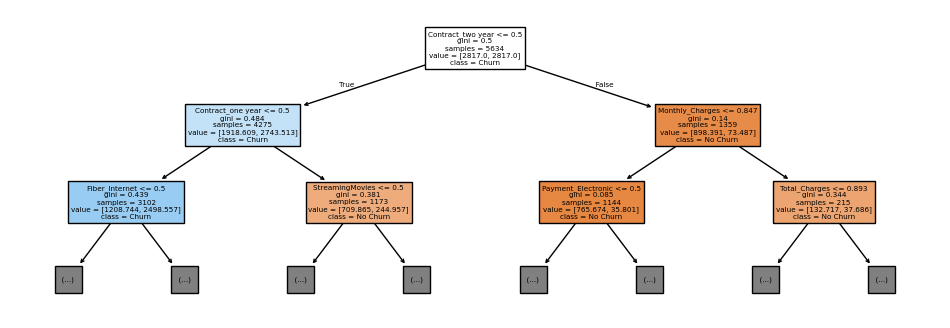

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plot_tree(dt_model, filled=True, max_depth=2, feature_names=X_train.columns, class_names=['No Churn', 'Churn'])
plt.show()


In [ ]:
Interpretation of Your Decision Tree Plot

Root Node

First Split: Contract term (one year <= 0.5)
This indicates that contract length is the most important factor in predicting churn
The root node contains 0.5 gini impurity and represents the entire dataset

Left Branch (Contract term <= 0.5 = True)
This branch represents customers with shorter contracts (monthly or less than 1 year):

Second Level Split: Contract one year <= 0.5

Customers with even shorter contracts (likely month-to-month)
Higher gini impurity (0.492) indicates more uncertainty in prediction
This node has a higher churn rate


Third Level Split (Left side):

Split on Fiber Internet <= 0.5
Customers without fiber have churn class prediction
Gini = 0.499 (very high uncertainty)


Third Level Split (Right side):

Split on StreamingMovies <= 0.5
Customers with streaming movies feature have different churn patterns
Gini = 0.381 (more predictive than the fiber split)



Right Branch (Contract term <= 0.5 = False)
This branch represents customers with longer contracts (more than 1 year):

Second Level Split: Monthly Charges <= 0.847

Splits customers by their monthly payment amount
Gini = 0.334 (lower impurity than the left branch)


Third Level Split (Left side):

Split on Payment Electronic <= 0.5
Gini = 0.085 (very low - highly predictive)
Strong prediction of "No Churn" for these customers


Third Level Split (Right side):

Split on Total Charges <= 0.893
Gini = 0.344 (moderate impurity)
Also predicts "No Churn" but with less certainty



Key Insights:

Contract length is the primary predictor of churn - customers with shorter contracts are more likely to churn
Higher monthly charges appear to increase churn risk, particularly for customers with longer contracts
Electronic payment methods seem to correlate with customer retention in the longer contract segment
Fiber Internet and Streaming Movies services influence churn decisions for customers with shorter contracts

This tree suggests focusing retention efforts on customers with shorter contracts, particularly those with specific service combinations.
The model demonstrates that long-term contracts combined with electronic payments create the most stable customer relationships.

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = df.drop('Churn', axis = 1)
y = df['Churn']

#Split the data

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

#Create the model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #n_estimators=100 - Build a forest of 100 trees, and let them all vote on the best prediction."

rf_model.fit(X_train, y_train)

#Predicting the model

y_predict = rf_model.predict(X_test)

#Evaluating the model

print("Classification Report:\n", classification_report(y_test,y_predict))
print("confusion Matrix:\n", confusion_matrix(y_test, y_predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

confusion Matrix:
 [[940  96]
 [192 181]]


# Feature Importance

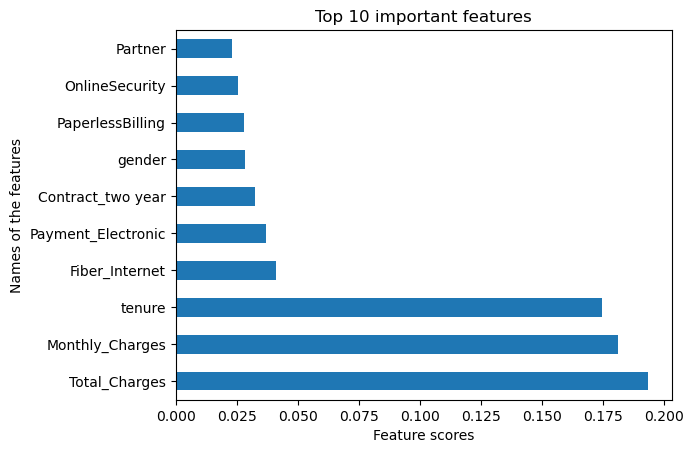

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get feature importances from the trained model
feature_importances = pd.Series(rf_model.feature_importances_, index = X.columns)

# Plot top 10 important features

feature_importances.nlargest(10).plot(kind = 'barh')
plt.title("Top 10 important features")
plt.xlabel("Feature scores")
plt.ylabel("Names of the features")
plt.show()


# Visualize a Few Trees

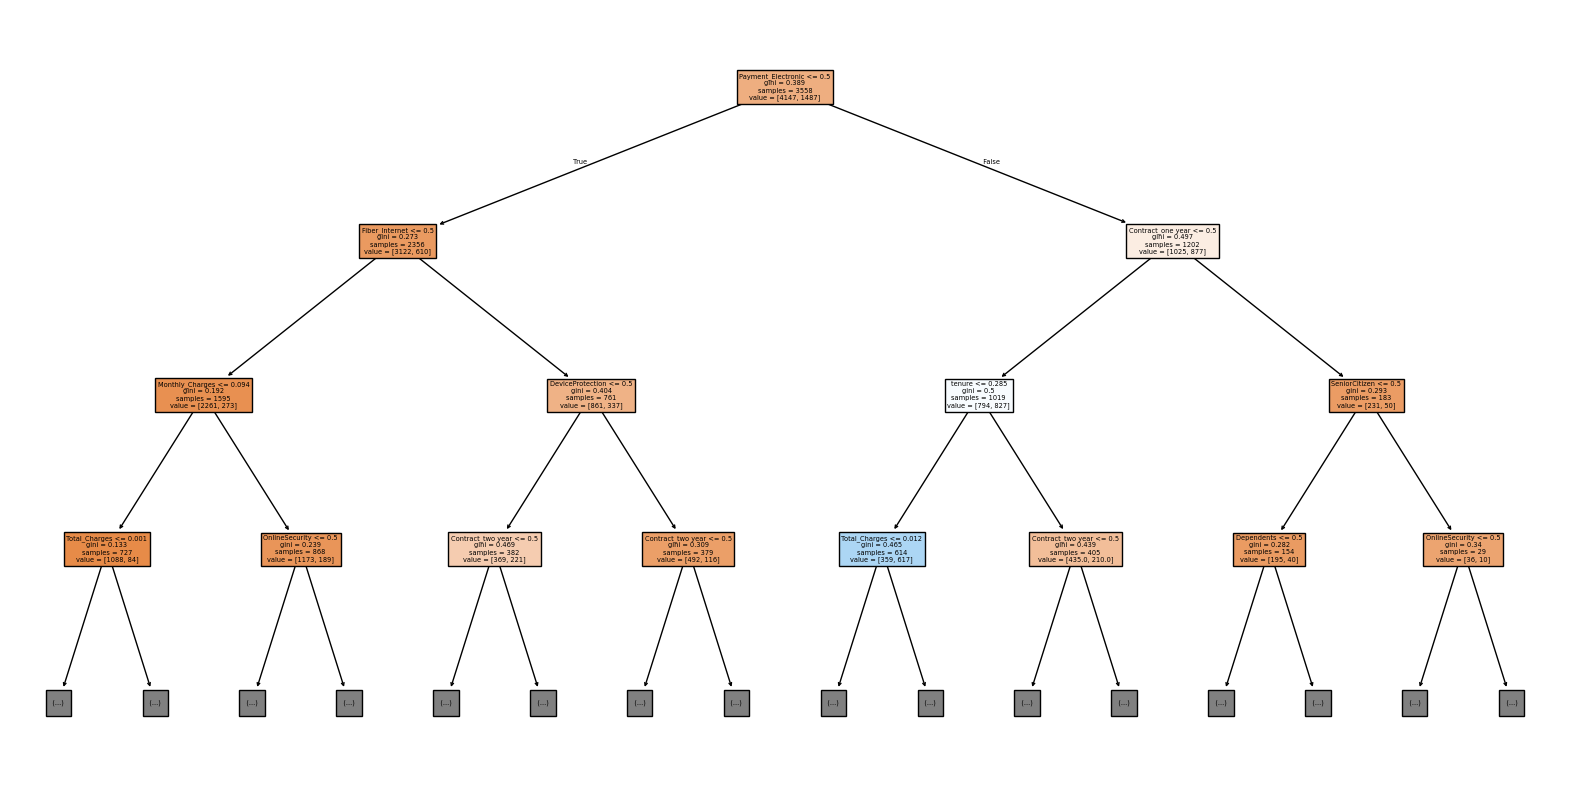

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.show()


In [ ]:
“Random Forest analysis confirms that short contract terms and high monthly charges are strong predictors of churn.
Notably, customers with streaming services and fiber internet are more volatile,
while long-term customers using electronic payments are highly stable.”